In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [38]:
sales_data = pd.read_csv('advertising.csv')

In [39]:
sales_data.head

<bound method NDFrame.head of         TV  Radio  Newspaper  Sales
0    230.1   37.8       69.2   22.1
1     44.5   39.3       45.1   10.4
2     17.2   45.9       69.3   12.0
3    151.5   41.3       58.5   16.5
4    180.8   10.8       58.4   17.9
..     ...    ...        ...    ...
195   38.2    3.7       13.8    7.6
196   94.2    4.9        8.1   14.0
197  177.0    9.3        6.4   14.8
198  283.6   42.0       66.2   25.5
199  232.1    8.6        8.7   18.4

[200 rows x 4 columns]>

In [40]:
sales_data.tail

<bound method NDFrame.tail of         TV  Radio  Newspaper  Sales
0    230.1   37.8       69.2   22.1
1     44.5   39.3       45.1   10.4
2     17.2   45.9       69.3   12.0
3    151.5   41.3       58.5   16.5
4    180.8   10.8       58.4   17.9
..     ...    ...        ...    ...
195   38.2    3.7       13.8    7.6
196   94.2    4.9        8.1   14.0
197  177.0    9.3        6.4   14.8
198  283.6   42.0       66.2   25.5
199  232.1    8.6        8.7   18.4

[200 rows x 4 columns]>

In [41]:
sales_data.describe

<bound method NDFrame.describe of         TV  Radio  Newspaper  Sales
0    230.1   37.8       69.2   22.1
1     44.5   39.3       45.1   10.4
2     17.2   45.9       69.3   12.0
3    151.5   41.3       58.5   16.5
4    180.8   10.8       58.4   17.9
..     ...    ...        ...    ...
195   38.2    3.7       13.8    7.6
196   94.2    4.9        8.1   14.0
197  177.0    9.3        6.4   14.8
198  283.6   42.0       66.2   25.5
199  232.1    8.6        8.7   18.4

[200 rows x 4 columns]>

In [42]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [43]:
sales_data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

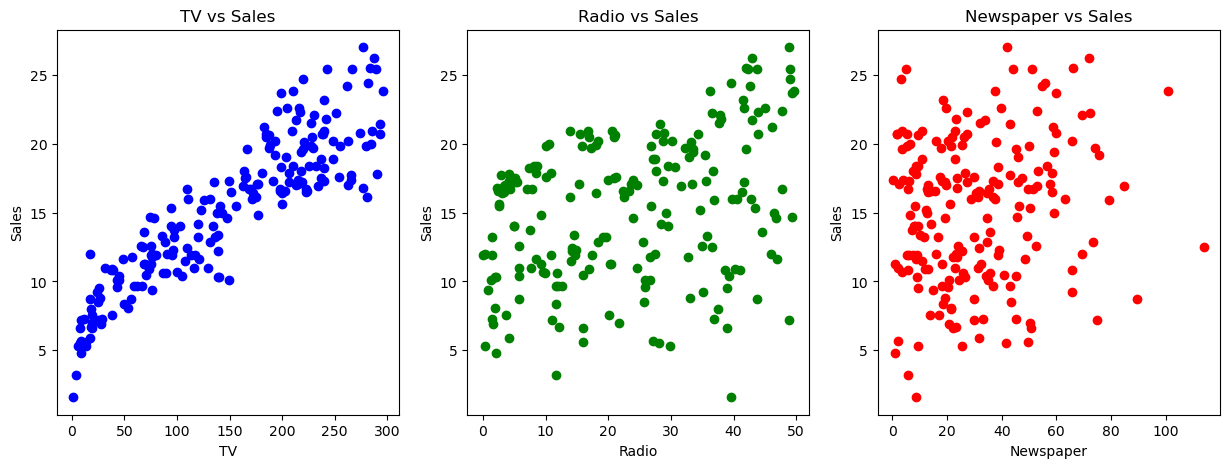

In [44]:
# Visualize the dataset
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].scatter(sales_data['TV'], sales_data['Sales'], color='blue')
axs[0].set_title('TV vs Sales')
axs[0].set_xlabel('TV')
axs[0].set_ylabel('Sales')

axs[1].scatter(sales_data['Radio'], sales_data['Sales'], color='green')
axs[1].set_title('Radio vs Sales')
axs[1].set_xlabel('Radio')
axs[1].set_ylabel('Sales')

axs[2].scatter(sales_data['Newspaper'], sales_data['Sales'], color='red')
axs[2].set_title('Newspaper vs Sales')
axs[2].set_xlabel('Newspaper')
axs[2].set_ylabel('Sales')

plt.show()

C:\Users\brahm\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\brahm\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\brahm\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\brahm\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

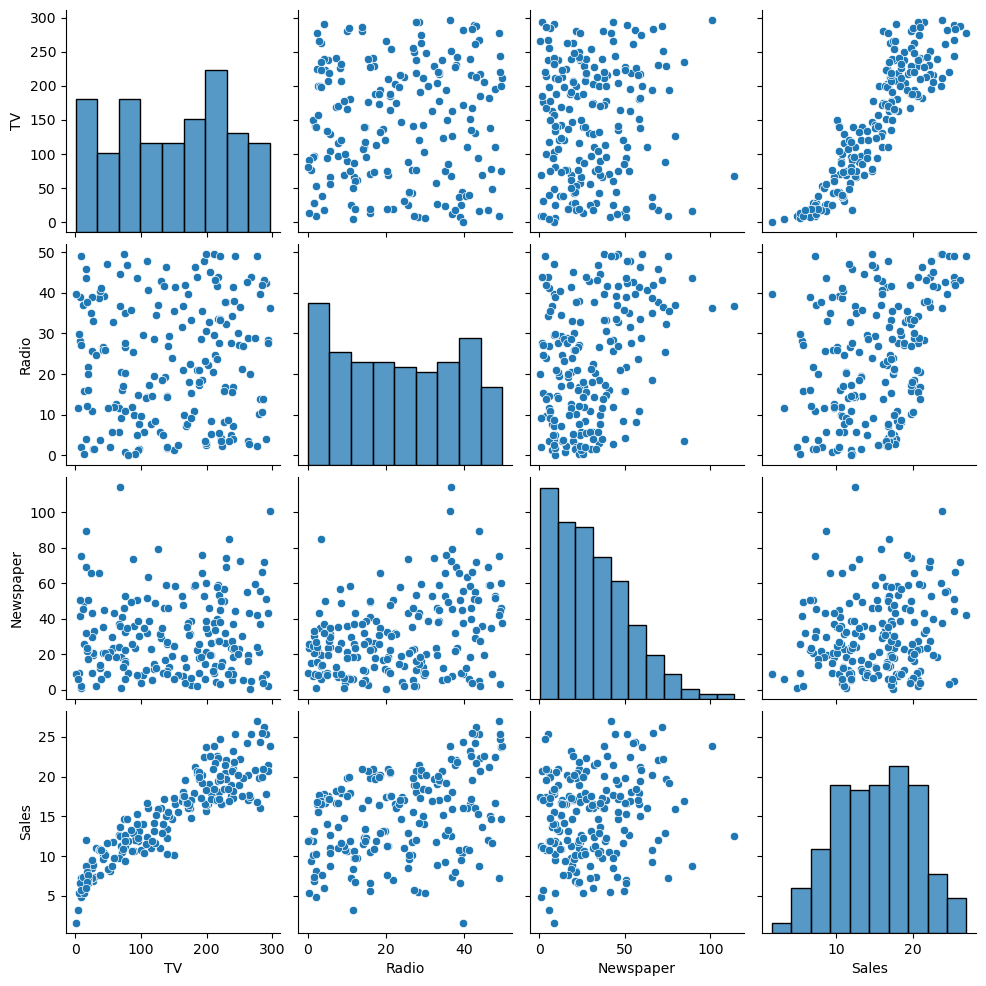

In [45]:
sns.pairplot(sales_data)
plt.show()

In [46]:
# Split dataset into features (X) and target (y)
X = sales_data[['TV', 'Radio', 'Newspaper']]  # Features
y = sales_data['Sales']     


In [47]:
# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [48]:
# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [49]:
# Make predictions
y_pred = model.predict(X_test)


In [50]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 2.907756910271091


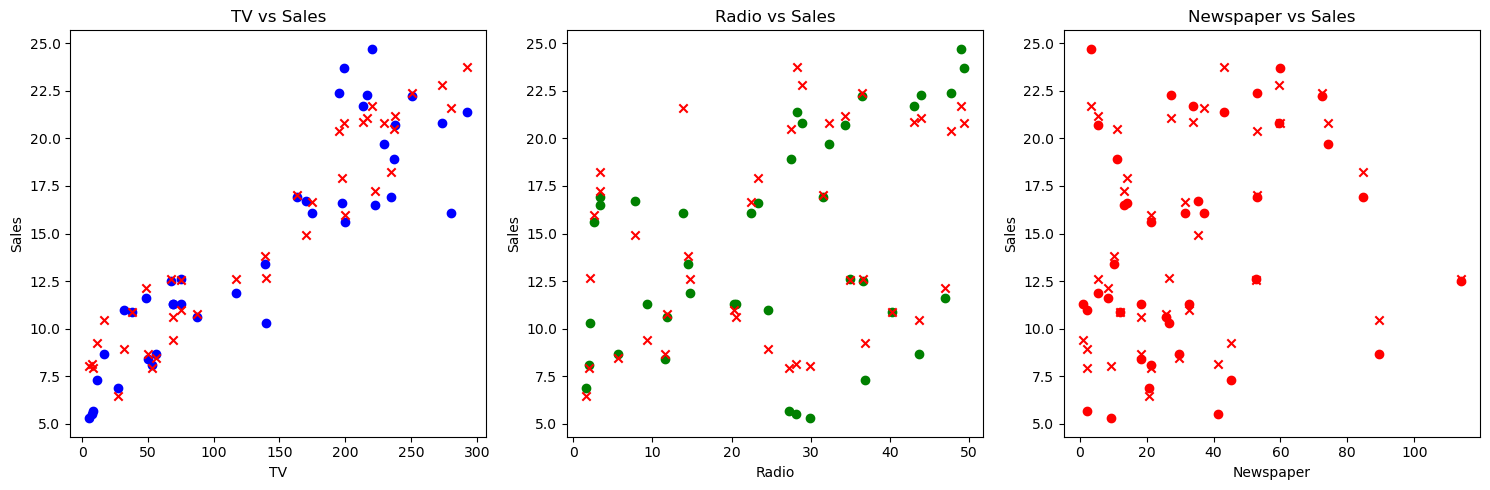

In [51]:
# Plot the regression line for each feature
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.scatter(X_test['TV'], y_test, color='blue')
plt.scatter(X_test['TV'], y_pred, color='red', marker='x')
plt.title('TV vs Sales')
plt.xlabel('TV')
plt.ylabel('Sales')

plt.subplot(1, 3, 2)
plt.scatter(X_test['Radio'], y_test, color='green')
plt.scatter(X_test['Radio'], y_pred, color='red', marker='x')
plt.title('Radio vs Sales')
plt.xlabel('Radio')
plt.ylabel('Sales')

plt.subplot(1, 3, 3)
plt.scatter(X_test['Newspaper'], y_test, color='red')
plt.scatter(X_test['Newspaper'], y_pred, color='red', marker='x')
plt.title('Newspaper vs Sales')
plt.xlabel('Newspaper')
plt.ylabel('Sales')

plt.tight_layout()
plt.show()